In [1]:
import datetime

import pandas
import numpy

import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.dates import date2num, DateFormatter, MonthLocator, YearLocator, DayLocator, HourLocator

%matplotlib inline

In [2]:
# Read OMNI data
omni_df = pandas.read_csv("data/omni_data.txt", delim_whitespace=True)
omni_df.head()

,Year,DoY,Hour,Minute,Bx,By,Bz,Speed,Density
0,2013,1,0,0,2.53,-0.92,0.17,99999.9,999.99
1,2013,1,0,1,9999.99,9999.99,9999.99,99999.9,999.99
2,2013,1,0,2,2.68,-0.76,0.15,350.3,2.11
3,2013,1,0,3,2.56,-0.82,0.10,352.5,2.12
4,2013,1,0,4,2.52,-1.03,0.10,353.0,2.12


In [3]:
# Now we'll merge the year, doy, hour, minute cols
# into a single datetime column!
# Notice the format keyword...that is key here
omni_df["datetime"] = pandas.to_datetime(
    omni_df['Year'] * 10000000 + omni_df['DoY']*10000+
    omni_df['Hour']*100+omni_df['Minute'],
    format='%Y%j%H%M'
)
omni_df.head()

,Year,DoY,Hour,Minute,Bx,By,Bz,Speed,Density,datetime
0,2013,1,0,0,2.53,-0.92,0.17,99999.9,999.99,2013-01-01 00:00:00
1,2013,1,0,1,9999.99,9999.99,9999.99,99999.9,999.99,2013-01-01 00:01:00
2,2013,1,0,2,2.68,-0.76,0.15,350.3,2.11,2013-01-01 00:02:00
3,2013,1,0,3,2.56,-0.82,0.10,352.5,2.12,2013-01-01 00:03:00
4,2013,1,0,4,2.52,-1.03,0.10,353.0,2.12,2013-01-01 00:04:00


In [4]:
# Make a stack plot showing different IMF/SW parameters 
# for the 2013 St. Patricks day storm!!!
# first select the date range
storm_start_date = datetime.datetime(2013,3,17)
storm_end_date = datetime.datetime(2013,3,19)
storm_df = omni_df[
    (omni_df["datetime"] >= storm_start_date) &
    (omni_df["datetime"] <= storm_end_date)
    
]
storm_df.head()

,Year,DoY,Hour,Minute,Bx,By,Bz,Speed,Density,datetime
108000,2013,76,0,0,9999.99,9999.99,9999.99,99999.9,999.99,2013-03-17 00:00:00
108001,2013,76,0,1,9999.99,9999.99,9999.99,99999.9,999.99,2013-03-17 00:01:00
108002,2013,76,0,2,9999.99,9999.99,9999.99,99999.9,999.99,2013-03-17 00:02:00
108003,2013,76,0,3,9999.99,9999.99,9999.99,99999.9,999.99,2013-03-17 00:03:00
108004,2013,76,0,4,9999.99,9999.99,9999.99,99999.9,999.99,2013-03-17 00:04:00


In [5]:
# Let's take a quick look at 
# a summary of each of the columns!
print(storm_df.describe())
# Notice that max values of some of these cols
# are 9999.99 or 999.99 - unrealistic values!

         Year          DoY         Hour       Minute          Bx           By  \
count  2881.0  2881.000000  2881.000000  2881.000000  2881.00000  2881.000000   
mean   2013.0    76.500521    11.496008    29.489760  1472.55697  1470.237560   
std       0.0     0.500780     6.925501    17.326821  3543.02787  3543.989338   
min    2013.0    76.000000     0.000000     0.000000   -15.85000   -20.170000   
25%    2013.0    76.000000     5.000000    14.000000    -3.43000    -3.420000   
50%    2013.0    77.000000    11.000000    29.000000     3.12000    -0.990000   
75%    2013.0    77.000000    17.000000    44.000000     8.79000     1.820000   
max    2013.0    78.000000    23.000000    59.000000  9999.99000  9999.990000   

                Bz         Speed      Density  
count  2881.000000   2881.000000  2881.000000  
mean   1472.276484  30496.823221   304.259604  
std    3543.145591  45609.961242   456.566005  
min     -19.340000    410.300000     1.180000  
25%      -3.470000    554.1000

In [6]:
# Replace them with NaNs
storm_df.loc[numpy.abs(storm_df['Bz']) > 100, 'Bz'] = numpy.nan
storm_df.loc[numpy.abs(storm_df['By']) > 100, 'By'] = numpy.nan
storm_df.loc[numpy.abs(storm_df['Bx']) > 100, 'Bx'] = numpy.nan
storm_df.loc[numpy.abs(storm_df['Speed']) > 9999, 'Speed'] = numpy.nan
storm_df.loc[numpy.abs(storm_df['Density']) > 999, 'Density'] = numpy.nan
# Lets see the summary again!
print(storm_df.describe())

         Year          DoY         Hour       Minute           Bx  \
count  2881.0  2881.000000  2881.000000  2881.000000  2457.000000   
mean   2013.0    76.500521    11.496008    29.489760     0.993435   
std       0.0     0.500780     6.925501    17.326821     5.913673   
min    2013.0    76.000000     0.000000     0.000000   -15.850000   
25%    2013.0    76.000000     5.000000    14.000000    -4.020000   
50%    2013.0    77.000000    11.000000    29.000000     1.280000   
75%    2013.0    77.000000    17.000000    44.000000     6.270000   
max    2013.0    78.000000    23.000000    59.000000    11.120000   

                By           Bz        Speed      Density  
count  2457.000000  2457.000000  2014.000000  2014.000000  
mean     -1.726231     0.664546   576.680437     4.756996  
std       4.072649     6.693825    80.417196     3.186444  
min     -20.170000   -19.340000   410.300000     1.180000  
25%      -3.840000    -4.960000   518.775000     2.740000  
50%      -1.600000

/home/bharat/anaconda3/envs/data_analysis/lib/python3.7/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/bharat/anaconda3/envs/data_analysis/lib/python3.7/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/bharat/anaconda3/envs/data_analysis/lib/python3.7/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/bharat/anaconda3/envs/data_analysis/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator


<Figure size 864x576 with 0 Axes>

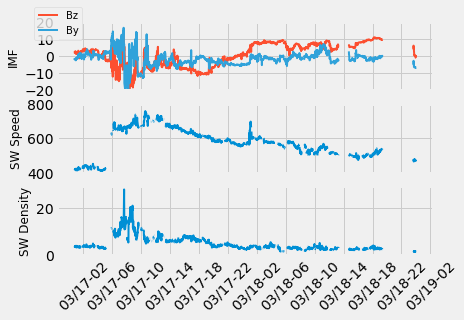

In [7]:
plt.style.use("fivethirtyeight")
lab_fontsize = 12
tick_fontsize = 12
cbar_fontsize = 8

fig = plt.figure(figsize=(12, 8))
fig, ax_arr = plt.subplots(3, sharex=True)

################## Panel-1 IMF Bz/By ##################
ax_arr[0].plot(storm_df["datetime"].values, storm_df["Bz"].values,\
               c="#fc4f30", lw=2, label="Bz")
# ax2 = ax_arr[0].twinx()
ax_arr[0].plot(storm_df["datetime"].values, storm_df["By"].values,\
         c="#30a2da", lw=2, label="By")

ax_arr[0].set_ylim([-20,20])
ax_arr[0].set_yticks([-20, -10, 0, 10, 20])
ax_arr[0].set_ylabel("IMF", fontsize=lab_fontsize)
ax_arr[0].legend(prop={'size': 10}, bbox_to_anchor=(0.15, 0.8),bbox_transform=fig.transFigure)
# ax_arr[0].tick_params(axis='y',labelsize=tick_fontsize, colors="#008fd5")
# ax2.set_ylim([-20,10])
# ax2.set_yticks([-20, -10, 0, 10])
# ax2.set_ylabel("hEs [Km]",c="#e5ae38", fontsize=lab_fontsize)
# ax2.tick_params(axis='y',labelsize=tick_fontsize, colors="#e5ae38")
################## Panel-1 IMF Bz/By ##################

################## Panel-2 SW Speed ##################
ax_arr[1].plot(storm_df["datetime"].values, storm_df["Speed"].values,\
               lw=2)
ax_arr[1].set_ylabel("SW Speed", fontsize=lab_fontsize)
ax_arr[1].set_ylim([400,800])
################## Panel-2 SW Speed ##################

################## Panel-3 Density ##################
ax_arr[2].plot(storm_df["datetime"].values, storm_df["Density"].values,\
               lw=2)
ax_arr[2].set_ylabel("SW Density", fontsize=lab_fontsize)
################## Panel-3 Density ##################

# rotate the xtick labels to make the plots more readable!
ax_arr[2].set_xticklabels(ax_arr[2].get_xticks(), rotation = 45)
# Now format the xtick labels such that they show month and day!
ax_arr[2].xaxis.set_major_formatter(DateFormatter('%m/%d-%H'))
# Place a label every 4 days!!!
ax_arr[2].xaxis.set_major_locator(HourLocator(interval=4))

In [8]:
# Read the symH/AsyH indices using Pandas!
sym_df = pandas.read_csv("data/Asy_processed.txt", delim_whitespace=True)
#convert to datetime column!
sym_df["datetime"] = pandas.to_datetime(sym_df["datetimeStr"], format="%Y%m%d-%H-%M")
sym_df.head()

,datetimeStr,AsyD,AsyH,SymD,SymH,datetime
0,20110101-00-00,17.0,13.0,1.0,-10.0,2011-01-01 00:00:00
1,20110101-00-01,17.0,13.0,1.0,-10.0,2011-01-01 00:01:00
2,20110101-00-02,17.0,13.0,1.0,-10.0,2011-01-01 00:02:00
3,20110101-00-03,17.0,13.0,1.0,-10.0,2011-01-01 00:03:00
4,20110101-00-04,17.0,13.0,1.0,-10.0,2011-01-01 00:04:00


In [9]:
# We'll merge data from both sym and IMF df
imf_sym_df = pandas.merge(
    omni_df[['Bx', 'By', 'Bz', 'Speed', 'Density', 'datetime']],
    sym_df[['AsyD', 'AsyH', 'SymD', 'SymH', 'datetime']],
    on=["datetime"]
)
imf_sym_df.head()

,Bx,By,Bz,Speed,Density,datetime,AsyD,AsyH,SymD,SymH
0,2.53,-0.92,0.17,99999.9,999.99,2013-01-01 00:00:00,12.0,12.0,1.0,1.0
1,9999.99,9999.99,9999.99,99999.9,999.99,2013-01-01 00:01:00,12.0,12.0,1.0,1.0
2,2.68,-0.76,0.15,350.3,2.11,2013-01-01 00:02:00,12.0,12.0,1.0,1.0
3,2.56,-0.82,0.10,352.5,2.12,2013-01-01 00:03:00,13.0,13.0,1.0,2.0
4,2.52,-1.03,0.10,353.0,2.12,2013-01-01 00:04:00,12.0,11.0,1.0,2.0


In [10]:
# Exercise: Develop a correlation analysis between SymH/AsyH and IMF Bz or Solar wind speed

In [12]:
# Replace noisy values with NaNs
imf_sym_df.loc[numpy.abs(imf_sym_df['Bz']) > 100, 'Bz'] = numpy.nan
imf_sym_df.loc[numpy.abs(imf_sym_df['By']) > 100, 'By'] = numpy.nan
imf_sym_df.loc[numpy.abs(imf_sym_df['Bx']) > 100, 'Bx'] = numpy.nan
imf_sym_df.loc[numpy.abs(imf_sym_df['Speed']) > 9999, 'Speed'] = numpy.nan
imf_sym_df.loc[numpy.abs(imf_sym_df['Density']) > 999, 'Density'] = numpy.nan

In [25]:
# what is the distribution of IMF for different symh levels
sym_lt_100 = imf_sym_df[imf_sym_df["SymH"] <= -100]
sym_50_100 = imf_sym_df[(imf_sym_df["SymH"] <= -50) & (imf_sym_df["SymH"] > -100)]
sym_gt_50 = imf_sym_df[(imf_sym_df["SymH"] >= -50)]

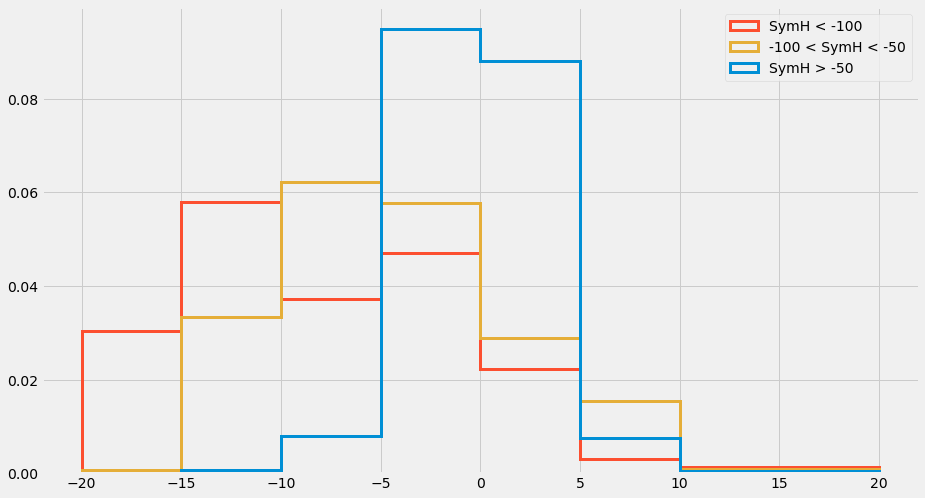

In [34]:
plt.style.use("fivethirtyeight")
f = plt.figure(figsize=(14, 8))
ax = f.add_subplot(1,1,1)


bins = [-20,-15,-10,-5,0,5,10,20]
ax.hist(sym_lt_100["Bz"], histtype="step", bins=bins,
        density=True, label="SymH < -100", lw=3, color="#fc4f30")
ax.hist(sym_50_100["Bz"], histtype="step", bins=bins,
        density=True, label="-100 < SymH < -50", lw=3, color="#e5ae38")
ax.hist(sym_gt_50["Bz"], histtype="step", bins=bins,\
        density=True, label="SymH > -50", lw=3, color="#008fd5")
ax.legend()

# Questions: 
#1) Why did we use the density keyword here?
#2) More importantly what pattern do you observe here?

In [ ]:
# Challenge: Can you develop a correlation between SymH 
# and median/min/peak values of Bz and SW Speed in the last 1 hour!!!